**Part 1:**

- a)Calls for police services of the city of Durham. 
- b)Each row is an event/call for police services. 
- c) nature is the description for the service and disposition is how the case/call was closed or settled. 

**Part 2:**

In [5]:
import pandas as pd

#1
file = 'lab7-dataset.xlsx'
df = pd.read_excel(file)

print(df.head())

   Event Number Case Number  Call Date   Call Time             Source  \
0    2018000003         NaN 2018-01-01  12:00:58AM              E-911   
1    2018000004         NaN 2018-01-01  12:01:08AM            Texting   
2    2018000006         NaN 2018-01-01  12:02:09AM  Wireless 911 Call   
3    2018000007         NaN 2018-01-01  12:03:02AM  Wireless 911 Call   
4    2018000008         NaN 2018-01-01  12:03:12AM  Wireless 911 Call   

  Priority          Nature                       Address        X       Y  \
0        2  SOUND OF SHOTS               200 N DRIVER ST  2036045  814259   
1        3  SOUND OF SHOTS  FAYETTEVILLE ST/E UMSTEAD ST  2029991  812623   
2        3  SOUND OF SHOTS            900 CHALK LEVEL RD  2026288  836736   
3        3  SOUND OF SHOTS                 2800 CREST ST  2017104  823729   
4        3  SOUND OF SHOTS  ELM TREE CT/MAGNOLIA TREE LN  2035525  799228   

  District Beat              Disposition  Cancelled  
0       D1  114  Resolved Without Report    

In [7]:
#2
#a
print(df.dtypes)
event_number_dtype = df['Event Number'].dtype
print(f"Data type of 'Event Number': {event_number_dtype}")

#b
priority_unique_values = df['Priority'].nunique()
print(f"Number of unique values in 'Priority' column: {priority_unique_values}")

#c
non_object_columns = df.select_dtypes(exclude='object').columns
print(f"Columns with data types other than 'object': {non_object_columns}")


Event Number             int64
Case Number             object
Call Date       datetime64[ns]
Call Time               object
Source                  object
Priority                object
Nature                  object
Address                 object
X                        int64
Y                        int64
District                object
Beat                    object
Disposition             object
Cancelled                 bool
dtype: object
Data type of 'Event Number': int64
Number of unique values in 'Priority' column: 10
Columns with data types other than 'object': Index(['Event Number', 'Call Date', 'X', 'Y', 'Cancelled'], dtype='object')


Disposition Counts:
Disposition
Resolved Without Report             178893
Cancelled                            30974
Incident Report                      28290
Cell Phone Hang Up                   18368
Accident Report                      13719
Unfounded                            13485
False Alarm                          13149
Verbal Warning                        6569
(blank)                               6373
Duplicate Event                       5590
Citation Issued                       5445
Referred Elsewhere                    3544
CIT - No Report                       2175
Assist/Backup Unit                    2060
Refusal To Stop                       1608
Information Relayed                   1179
Test Entry                             891
Written Warning                        858
Entered As BOLO                        730
CIT - Incident Report                  399
Property Report                        344
Police Not Needed                      332
Accidentially Chose 'N

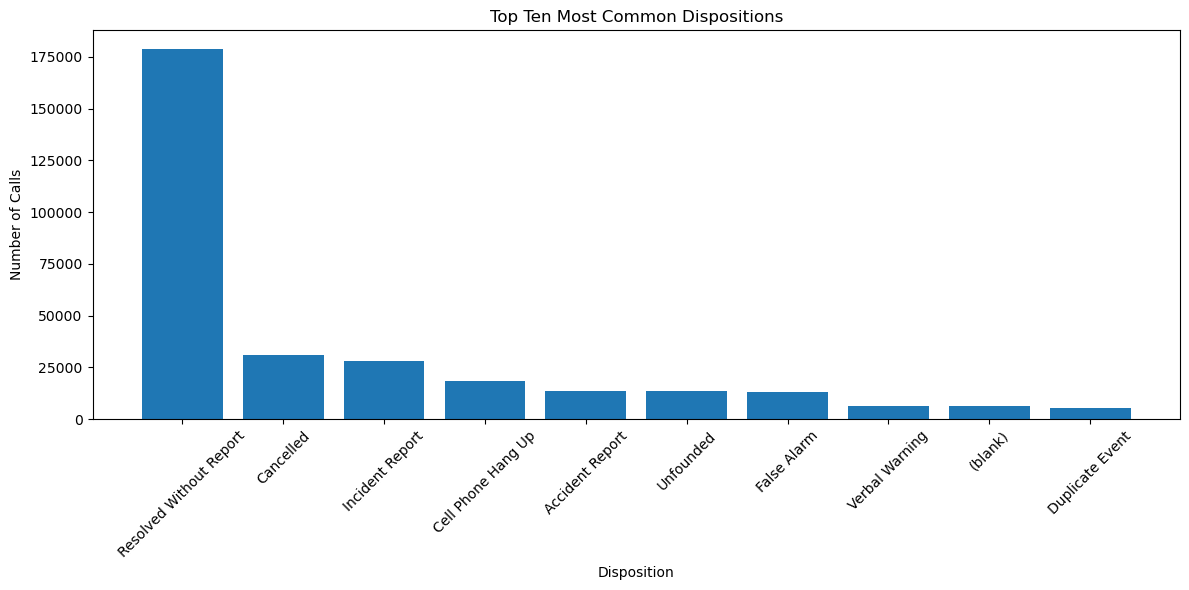

In [8]:
import matplotlib.pyplot as plt
#3
#a
disposition_counts = df['Disposition'].value_counts()


print("Disposition Counts:")
print(disposition_counts)

#b
values_occur_once = disposition_counts[disposition_counts == 1]
print(f"\nValues that occur only once:\n{values_occur_once}")

#c
resolved_without_report_count = disposition_counts.get('Resolved Without Report', 0)
total_calls_count = len(df)
percentage_resolved_without_report = (resolved_without_report_count / total_calls_count) * 100
print(f"\nPercentage of calls resolved without report: {percentage_resolved_without_report:.2f}%")


top_ten_dispositions = disposition_counts.head(10)

#d
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.bar(top_ten_dispositions.index, top_ten_dispositions.values)


ax.set_xlabel('Disposition')
ax.set_ylabel('Number of Calls')
ax.set_title('Top Ten Most Common Dispositions')


plt.xticks(rotation=45)
plt.tight_layout() 


plt.show()

In [11]:
#4
#a
first_100_rows = df.head(100)

#b
top_10_natures_first_100 = first_100_rows['Nature'].value_counts().head(10)
print("Top 10s in the First 100 Rows:")
print(top_10_natures_first_100)

#c
indexed_rows = df[(df['Event Number'] >= 2018145971) & (df['Event Number'] <= 2018146102)]

#d
top_10_natures_indexed = indexed_rows['Nature'].value_counts().head(10)
print("\nTop 10 between 2018145971 and 2018146102:")
print(top_10_natures_indexed)


natures_first_100 = set(top_10_natures_first_100.index)
natures_indexed = set(top_10_natures_indexed.index)

common_natures = natures_first_100.intersection(natures_indexed)
print(f"\n hunnid Rows and Indexed Rows: {common_natures}")


if len(natures_first_100) > len(natures_indexed):
    print("\nThere are more common natures in the first 100 rows.")
else:
    print("\nThere are more common natures in the indexed rows.")

Top 10s in the First 100 Rows:
Nature
SOUND OF SHOTS              43
DIRECTED PATROL             10
NOISE COMPLAINT              9
HANG UP WIRELESS PHASE 2     6
DISTURBANCE WITH WEAPON      6
HANG UP WIRELESS PHASE 1     4
ALARM                        3
DISTURBANCE                  3
ASSIST PERSON                2
DAMAGE TO PROPERTY           1
Name: count, dtype: int64

Top 10 between 2018145971 and 2018146102:
Nature
DIRECTED PATROL         33
PRIVATE TOW              7
ALARM                    5
PROPERTY CHECK           5
FOOT  PATROL             4
FOLLOW UP                4
SUSPICIOUS  ACTIVITY     4
HANG UP                  4
SOUND OF SHOTS           3
DISTURBANCE              3
Name: count, dtype: int64

 hunnid Rows and Indexed Rows: {'SOUND OF SHOTS', 'DIRECTED PATROL', 'ALARM', 'DISTURBANCE'}

There are more common natures in the indexed rows.


In [13]:
#5
print("DataFrame Overview:")
df.info()


non_null_case_number_count = df['Case Number'].notna().sum()
print(f"\nNumber of rows with a Case Num: {non_null_case_number_count}")


DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335386 entries, 0 to 335385
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Event Number  335386 non-null  int64         
 1   Case Number   46312 non-null   object        
 2   Call Date     335386 non-null  datetime64[ns]
 3   Call Time     335386 non-null  object        
 4   Source        335386 non-null  object        
 5   Priority      334956 non-null  object        
 6   Nature        335386 non-null  object        
 7   Address       334975 non-null  object        
 8   X             335386 non-null  int64         
 9   Y             335386 non-null  int64         
 10  District      323582 non-null  object        
 11  Beat          323901 non-null  object        
 12  Disposition   335386 non-null  object        
 13  Cancelled     335386 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(

**Part 3:**

1) 
   - a: One issue with this is that not every car accident has the police involved. So with this question we are
     assuming that there are no other accidents besides the ones called in.
   - b: I can't think of one for this, other than not knowing what "priority" is based on. 
   - c: I don't believe age is a column in the dataset so we can't "prove" this.

2) 
- a: alarm could count as theft. 
- b: 
    - i: What percentage of theft calls are disposed in succession?
    - ii: Is there a certain period of the month where theft is higher than other times? perhaps towards the end or 
begining, when rest is due?

In [19]:
print("\nValue counts for the 'Nature' column:")
nature_counts = df['Nature'].value_counts()
print(nature_counts)



Value counts for the 'Nature' column:
Nature
DIRECTED PATROL             69599
ALARM                       19031
HANG UP                     16548
HANG UP WIRELESS PHASE 2    16191
VEHICLE STOP                13973
                            ...  
TESTFIRE NATURE                 1
ROUND UP                        1
SICK PERSON                     1
BREATHING PROBLEM               1
TRESPA                          1
Name: count, Length: 178, dtype: int64


2)
   What is the average for calls categorized as "Assault" across different patrol districts?


**Bonus**

Number of Assault Calls by District:
  District  Number of Assault Calls
0       D1                      329
1       D4                      321
2       D2                      309
3       D3                      241
4       D5                      136


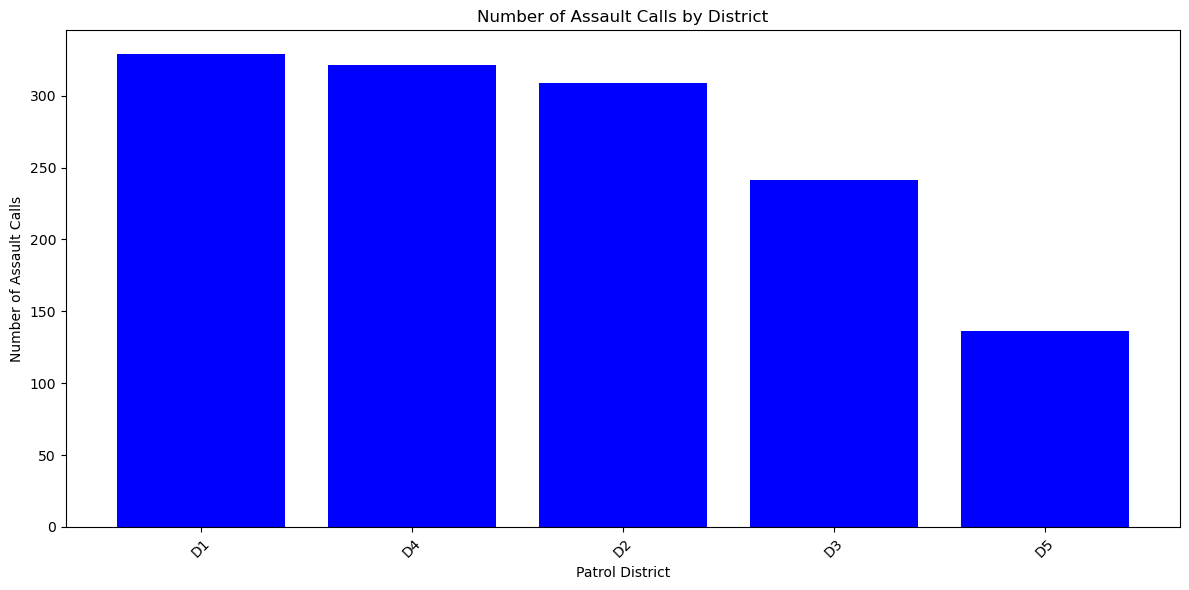

In [22]:
assault_calls = df[df['Nature'].str.contains('Assault', case=False, na=False)]

assault_counts = assault_calls['District'].value_counts().reset_index()
assault_counts.columns = ['District', 'Number of Assault Calls']

print("Number of Assault Calls by District:")
print(assault_counts)

plt.figure(figsize=(12, 6))
plt.bar(assault_counts['District'], assault_counts['Number of Assault Calls'], color='blue')
plt.title('Number of Assault Calls by District')
plt.xlabel('Patrol District')
plt.ylabel('Number of Assault Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()